
Descriptive Statistics of Selling Price:
count      300.00
mean     42182.33
std      12547.23
min      11125.00
25%      33393.75
50%      40562.50
75%      51012.50
max      74000.00
Name: price, dtype: float64


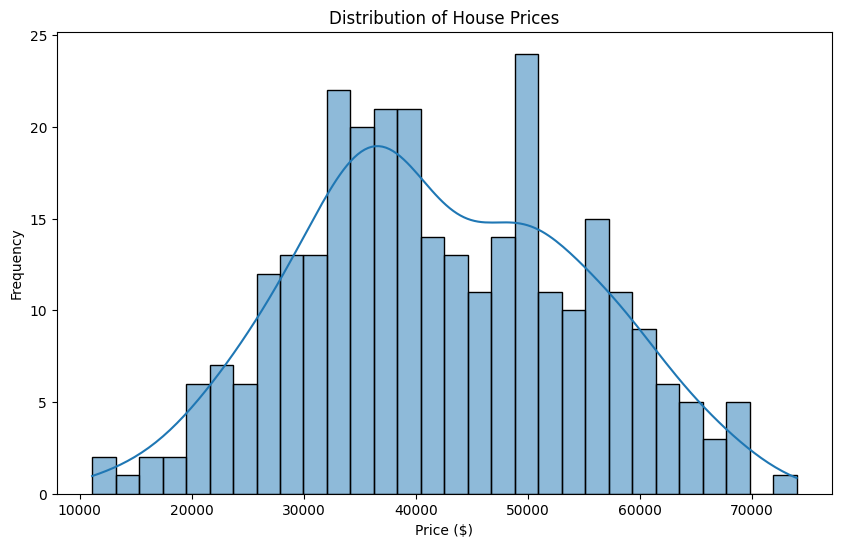


Regression Model Coefficients:
         Feature   Coefficient
0           size     24.085942
1       bedrooms   1681.863629
2      bathrooms   1391.698122
3     extraRooms   3452.172172
4         garage   9152.842862
5         garden  14983.851440
6  inSubdivision  -4946.331543
7         inCity  11797.835908
8   solarPowered   4442.150771

Intercept: 7543.68

Training Performance:
R-squared: 0.9896
MAE: $1056.99
RMSE: $1271.43

Predictions on 10% Data:
     Actual Price  Predicted Price  Absolute Error  Percent Error
203         33850         33271.21          578.79           1.71
266         55625         56885.26         1260.26           2.27
152         26675         27315.20          640.20           2.40
9           22300         22579.15          279.15           1.25
233         44375         45649.56         1274.56           2.87
226         45225         45140.51           84.49           0.19
196         36725         36948.32          223.32           0.61
109         40

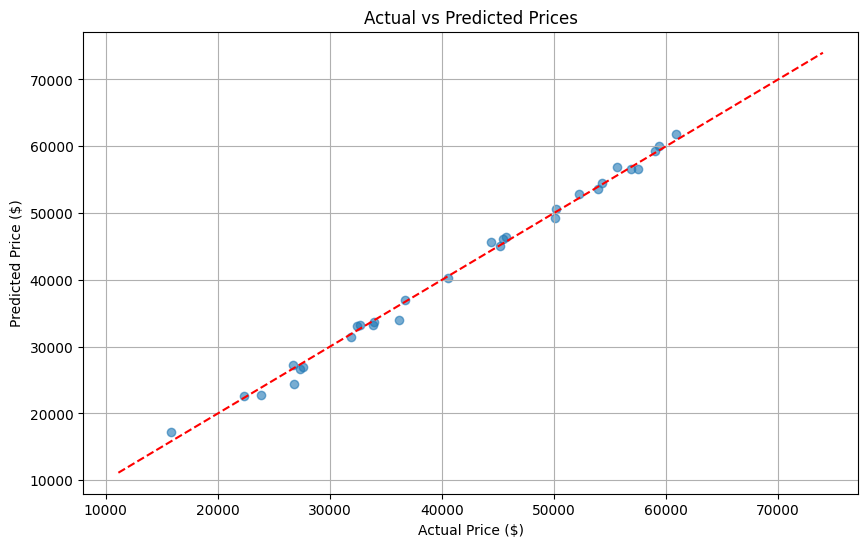

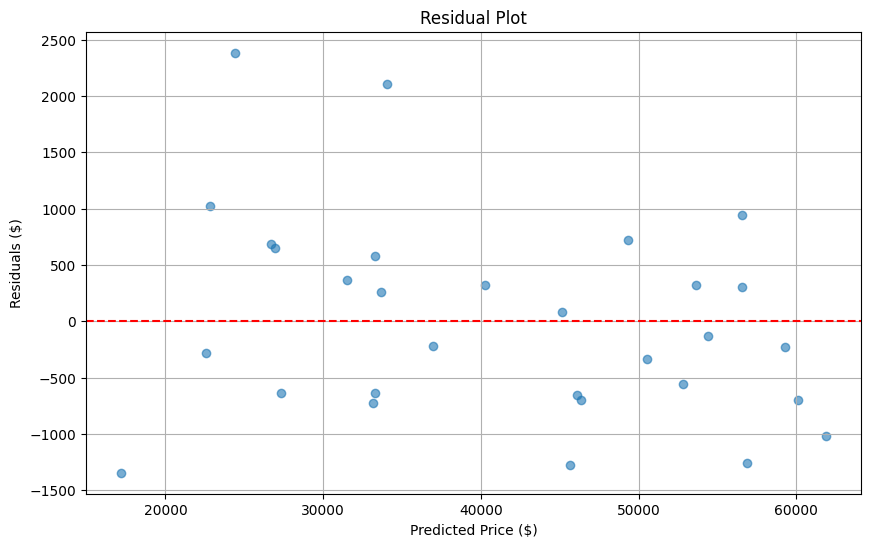

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('housePriceData.csv')

# Part a: Descriptive statistics of selling price
print("\nDescriptive Statistics of Selling Price:")
print(df['price'].describe().round(2))

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Part b: Multiple Linear Regression Model
# Define features (X) and target (y)
features = ['size', 'bedrooms', 'bathrooms', 'extraRooms', 
            'garage', 'garden', 'inSubdivision', 'inCity', 'solarPowered']
X = df[features]
y = df['price']

# Split data into train (90%) and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("\nRegression Model Coefficients:")
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coef_df)
print(f"\nIntercept: {model.intercept_:.2f}")

# Evaluate model on training data
train_pred = model.predict(X_train)
print("\nTraining Performance:")
print(f"R-squared: {r2_score(y_train, train_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_train, train_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_train, train_pred)):.2f}")

# Part c: Predictions on test data
test_pred = model.predict(X_test)

# Create prediction comparison dataframe
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': test_pred,
    'Absolute Error': np.abs(y_test - test_pred),
    'Percent Error': (np.abs(y_test - test_pred) / y_test) * 100
}).round(2)

# Display sample predictions
print("\nPredictions on 10% Data:")
print(results)

# Evaluate test performance
print("\nTest Performance Metrics:")
print(f"R-squared: {r2_score(y_test, test_pred):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, test_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, test_pred)):.2f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - test_pred
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.grid(True)
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('housePriceData.csv')

# Define features (X) and target (y)
features = ['size', 'bedrooms', 'bathrooms', 'extraRooms', 
            'garage', 'garden', 'inSubdivision', 'inCity', 'solarPowered']
X = df[features]
y = df['price']

# Split data into train (90%) and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("\nRegression Model Coefficients:")
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coef_df)
print(f"\nIntercept: {model.intercept_:.2f}")

# Print Multiple Regression Model
equation = "price = {:.2f}".format(model.intercept_)
for feature, coef in zip(features, model.coef_):
    equation += " + \n\t{:.2f}*{}".format(coef, feature) 
    
print("\nMultiple Regression Model:")
print(equation)


Regression Model Coefficients:
         Feature   Coefficient
0           size     24.085942
1       bedrooms   1681.863629
2      bathrooms   1391.698122
3     extraRooms   3452.172172
4         garage   9152.842862
5         garden  14983.851440
6  inSubdivision  -4946.331543
7         inCity  11797.835908
8   solarPowered   4442.150771

Intercept: 7543.68

Multiple Regression Model:
price = 7543.68 + 
	24.09*size + 
	1681.86*bedrooms + 
	1391.70*bathrooms + 
	3452.17*extraRooms + 
	9152.84*garage + 
	14983.85*garden + 
	-4946.33*inSubdivision + 
	11797.84*inCity + 
	4442.15*solarPowered
